# Problem statement:
The ride-hailing company faces significant operational losses and customer churn due to service failure events (cancellations, incomplete trips, etc.) in the highly competitive National Capital Region (NCR) market. The objective is to build a high-performance predictive model to estimate the probability of a ride request being successfully Completed at the time of booking. This prediction is critical for implementing proactive interventions to stabilize driver supply, reduce passenger friction, and maximize completed trip volume.

# EDA

In [2]:
import pandas as pd

# Extract the file ID from the Google Drive link
file_id = "13KW_CuVVqU3e2coQkUwhD_F-w4A_gcoo"

# Create the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file directly
df = pd.read_csv(url)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

Dataset shape: (150000, 21)

First few rows:
         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer

## Dataframe info

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [12]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,datetime,hour,day,month,weekday,is_weekend,is_cancelled_customer,is_cancelled_driver,is_incomplete
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024-11-11 19:34:01,19,11,11,0,False,False,False,False
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI,2024-11-24 15:55:09,15,24,11,6,True,False,False,False
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash,2024-09-18 10:55:15,10,18,9,2,False,False,False,False
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,NaN,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI,2024-10-05 07:53:34,7,5,10,5,True,False,False,False
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,NaN,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card,2024-03-10 15:38:03,15,10,3,6,True,False,False,False


In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [7]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [8]:
def detect_datetime_object_columns(
    df: pd.DataFrame,
    min_parse_ratio: float = 0.8,
    sample_size: int = 1000
) -> list:
    """
    Detects object columns that can be reliably parsed as datetime.
    """

    datetime_cols = []

    for col in df.select_dtypes(include=["object"]).columns:
        sample = df[col].dropna().head(sample_size)

        if sample.empty:
            continue

        parsed = pd.to_datetime(sample, errors="coerce", infer_datetime_format=True)
        parse_ratio = parsed.notna().mean()

        if parse_ratio >= min_parse_ratio:
            datetime_cols.append(col)

    return datetime_cols

detect_datetime_object_columns(df)

C:\Users\EGE1\AppData\Local\Temp\ipykernel_15068\1385596785.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(sample, errors="coerce", infer_datetime_format=True)
C:\Users\EGE1\AppData\Local\Temp\ipykernel_15068\1385596785.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(sample, errors="coerce", infer_datetime_format=True)
C:\Users\EGE1\AppData\Local\Temp\ipykernel_15068\1385596785.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To en

['Date', 'Time']

#EDA plan outline
1. Data Overview
   - Load the dataset and display its shape.
   - Show the first few rows of the dataset.
   - Display data types and non-null counts for each column.
2. Data Cleaning
    - Identify and handle missing values.
    - Detect and convert datetime columns.
    - Check for duplicates and remove if necessary.
3. Descriptive Statistics
    - Generate summary statistics for numerical columns.
    - Analyze categorical columns for unique values and frequency counts.
4. Data Visualization
    - Plot distributions of numerical features.
    - Visualize relationships between key variables.
    - Create time series plots for datetime features.

## Fill missing values

In [13]:
# Optional: Fill CTAT and VTAT with median if needed
df['Avg VTAT'] = df['Avg VTAT'].fillna(df['Avg VTAT'].median())
df['Avg CTAT'] = df['Avg CTAT'].fillna(df['Avg CTAT'].median())

## Plan to solve the case study
Decide which coluns are training set
classify the columns
encoding the columns
separate the leakage risk columns
Create feature engineering


## feature engineering

### Target variable

In [14]:
df['target_customer_cancelled'] = df['is_cancelled_customer'].astype(int)
# Quick target distribution check
df['target_customer_cancelled'].value_counts(normalize=True)

target_customer_cancelled
0    0.93
1    0.07
Name: proportion, dtype: float64

In [ ]:
# Convert Date and Time to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

# Extract temporal features
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['weekday'].isin([5, 6])

# Check result
df[['datetime', 'hour', 'day', 'month', 'weekday', 'is_weekend']].head()


,datetime,hour,day,month,weekday,is_weekend
0,2024-03-23 12:29:38,12,23,3,5,True
1,2024-11-29 18:01:39,18,29,11,4,False
2,2024-08-23 08:56:10,8,23,8,4,False
3,2024-10-21 17:17:25,17,21,10,0,False
4,2024-09-16 22:08:00,22,16,9,0,False


In [ ]:
# Create binary flags from cancellation/incomplete columns
# this helps to handle missing values effectively
df['is_cancelled_customer'] = df['Cancelled Rides by Customer'].notnull()
df['is_cancelled_driver'] = df['Cancelled Rides by Driver'].notnull()
df['is_incomplete'] = df['Incomplete Rides'].notnull()

In [23]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,datetime,hour,day,month,weekday,is_weekend,is_cancelled_customer,is_cancelled_driver,is_incomplete,target_customer_cancelled
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,12,23,3,5,True,False,False,False,0
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,18,29,11,4,False,False,False,True,0
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,8,23,8,4,False,False,False,False,0
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,17,21,10,0,False,False,False,False,0
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,22,16,9,0,False,False,False,False,0



# EDA v2

### Non completion rate across day, hour

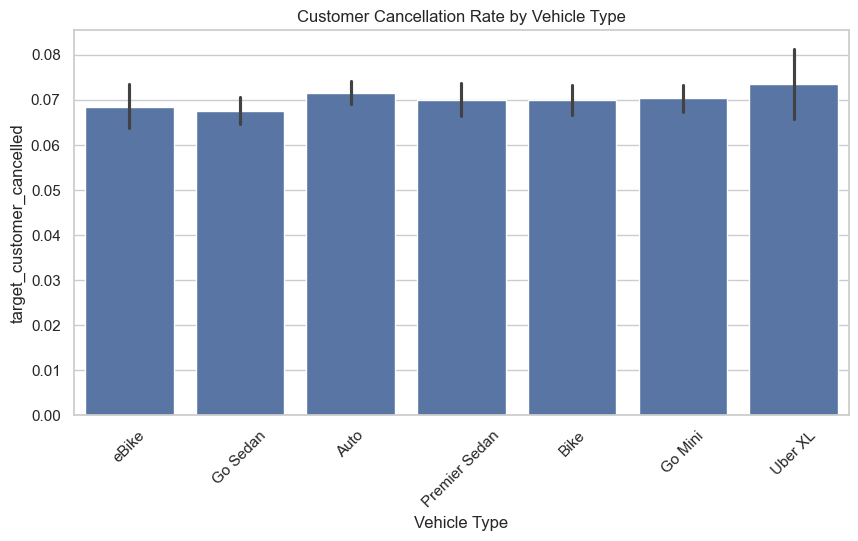

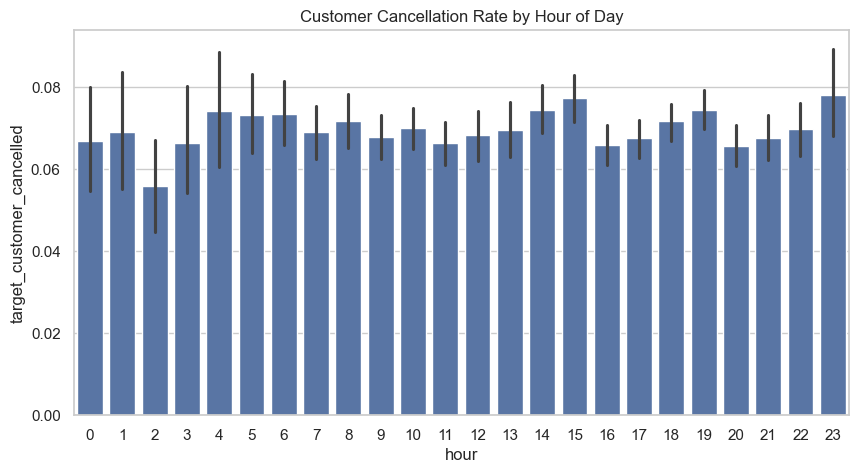

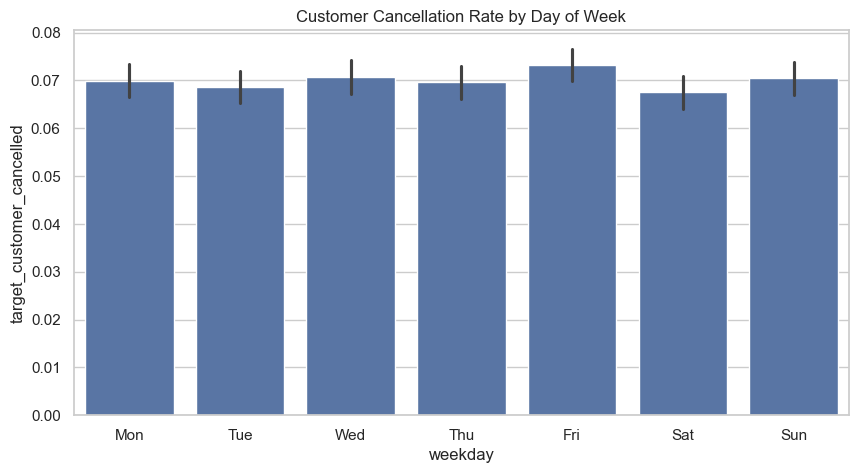

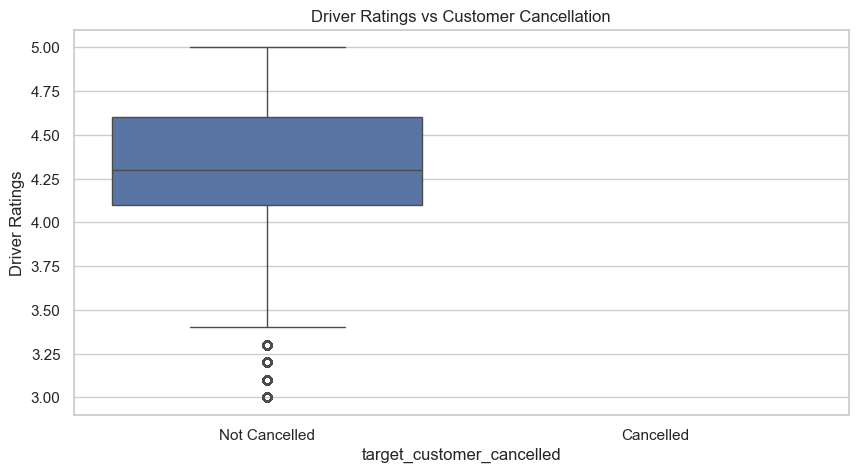

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Cancellation Rate by Vehicle Type
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Vehicle Type', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

# 2. Cancellation Rate by Hour
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='hour', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Hour of Day")
plt.show()

# 3. Cancellation Rate by Day of Week
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='weekday', y='target_customer_cancelled')
plt.title("Customer Cancellation Rate by Day of Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

# 4. Driver Rating vs Cancellation
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='target_customer_cancelled', y='Driver Ratings')
plt.title("Driver Ratings vs Customer Cancellation")
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.show()


### Geographical location vs cancellation rate

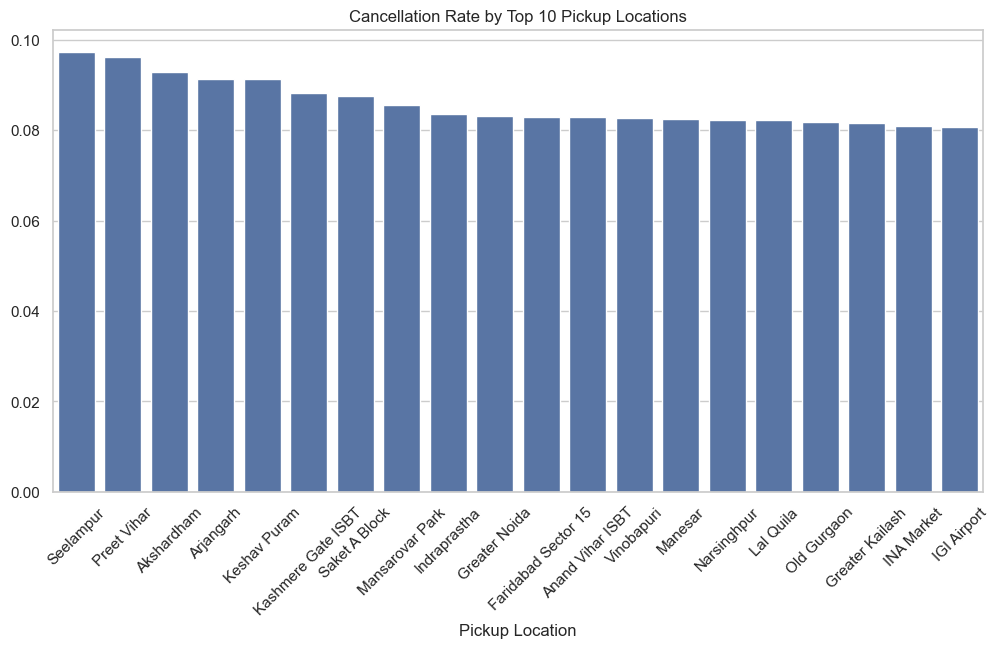

In [22]:
# 1. Top 10 Pickup Locations with high cancellation rates
df_top_pickups_cancellation = df.groupby('Pickup Location')['target_customer_cancelled'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_pickups_cancellation.index, y=df_top_pickups_cancellation.values)
plt.title("Cancellation Rate by Top 10 Pickup Locations")
plt.xticks(rotation=45)
plt.show()

### VTAT/CTAT vs. Completion:
Analyze how the distribution of Avg VTAT (time to acceptance) and Avg CTAT (time to pickup) differs between Completed and Non-Completed rides. High CTAT likely drives customer cancellation

avg VTAT for incomplete rides: is_incomplete
False    8.600620
True     6.013744
Name: Avg VTAT, dtype: float64
avg CTAT for incomplete rides: is_incomplete
False    29.614424
True     20.003233
Name: Avg CTAT, dtype: float64


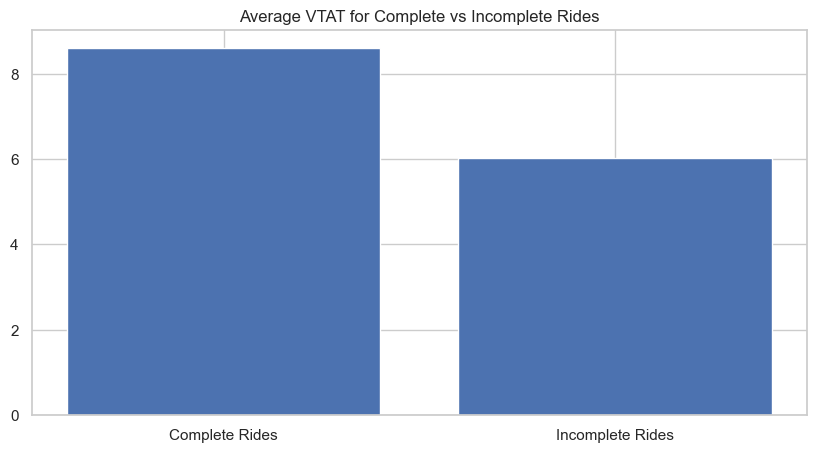

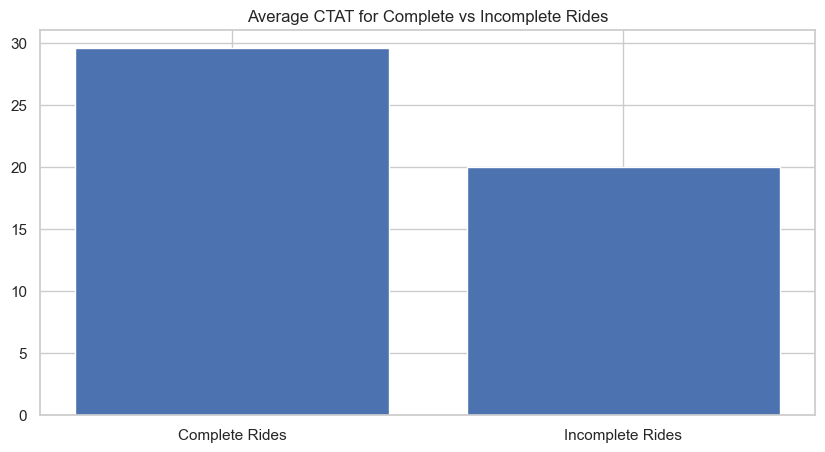

In [31]:
df_ride_comp_VTAT= df.groupby('is_incomplete')['Avg VTAT'].mean()
print(f"avg VTAT for incomplete rides: {df_ride_comp_VTAT.head()}")
df_ride_comp_CTAT= df.groupby('is_incomplete')['Avg CTAT'].mean()
print(f"avg CTAT for incomplete rides: {df_ride_comp_CTAT.head()}")

plt.figure(figsize=(10, 5))
plt.bar(['Complete Rides', 'Incomplete Rides'], df_ride_comp_VTAT.values)
plt.title("Average VTAT for Complete vs Incomplete Rides")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(['Complete Rides', 'Incomplete Rides'], df_ride_comp_CTAT.values)
plt.title("Average CTAT for Complete vs Incomplete Rides")
plt.show()

### Drop columns not needed for modeling

In [ ]:
# cancellation reasons isn't known before ride is booked.
drop_cols = [
    'Booking ID', 'Customer ID', 'Pickup Location', 'Drop Location',
    'Cancelled Rides by Customer', 'Reason for cancelling by Customer',
    'Cancelled Rides by Driver', 'Driver Cancellation Reason',
    'Incomplete Rides', 'Incomplete Rides Reason', 'Date', 'Time', 'datetime'
]
df.drop(columns=drop_cols, inplace=True)

## Q1. CTAT
Identify the Hours of the Day and Days of the Week where the average CTAT (Customer Travel Time to Acceptance) is highest and the completion rate is lowest. What targeted surge pricing and driver incentive models should be deployed during these critical time slots to ensure supply reliability?

## Q2. segmentation pickup loc
Segment the marketplace by Pickup Location and identify zones driving the highest cancellation and "No Driver Found" rates. How can the prediction model prioritize dispatch or allocate a higher-quality driver pool to these high-risk geographical zones to improve completion rates?

## q3. Feature importance
Using SHAP or Feature Importance analysis, identify the top three non-behavioral features (e.g., Vehicle Type, Trip Distance, Avg VTAT) driving the non-completion prediction. Which operational levers (e.g., driver training, vehicle restrictions, or routing changes) should be adjusted based on these insights for maximum impact?

## Q4 Booking value vs driver cancellation rate
Analyze the relationship between Booking Value (estimated fare) and driver cancellation rates. Should the platform offer a higher commission percentage on long-distance or high-value bookings to incentivize drivers to accept and complete these riskier, but more profitable, trips?

## Q5 freq driver cancellation reason
Analyze the most frequent Driver Cancellation Reason (e.g., "Customer taking too long," "Not comfortable with drop"). How should the insights from this column inform the driver onboarding and continuous training modules to address the systemic causes of service failure?

## Q6 completition rate vs customer demand vol
Compare the completion rate and customer demand volume across different Vehicle Type. Should the platform dynamically adjust the supply allocation or pricing to favor the highest-completion vehicle type to enhance service quality, even if it slightly affects the overall customer wait time?

## Q7
Evaluate the model's prediction fairness by comparing its F1 -score across different major pickup zones (e.g., North vs. South NCR). If performance disparities are found, what mitigation strategy (e.g., collecting more data from minority zones, using balanced loss) must be implemented to prevent service inequality?